<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Coloma%2C_Orbe%2C_Posso_Progreso_2_HW_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 2.1 (15%)
For the system implemented in homework HW 1.2 Sarw islands.
Use the simplest possible system limits ∈ {−1, 1}.
<h3>Answer the following:</h3>
List all possible walks in the sample space (and calculate their probability of occurring).
From the sample space above, what is the probability of occurring an iSarw (island with Area>0).
Compare with simulation results,
both the probability for all possible walks (5%) as well for an iSarw (5%).
List all possible steps for an iSarw, and define the PMF.
Compare with simulation results (5%).
<h3>Optional:</h3> Answer the items above for a traditional Sarw.

The figure below shows some of the elements of the sample space for this excercise:

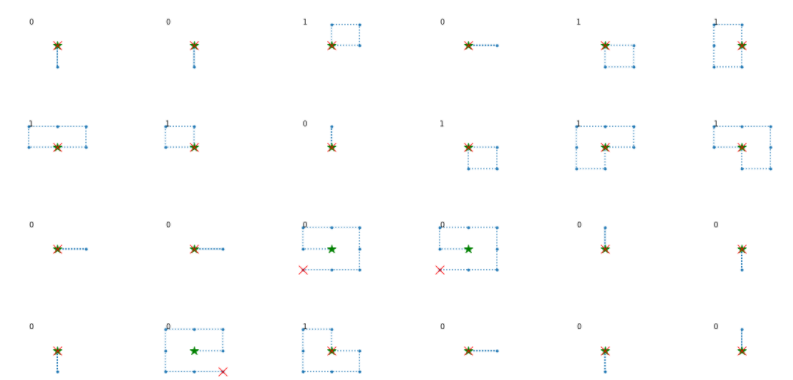

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time
from scipy.special import  comb

In [ ]:
List_all_moves = []

In [ ]:

def generateMove(x, y): #funcion que genera los movimientos
    return [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)] #retorna todos los movimientos

def SARW(steps = 10, origin = (0, 0), limit = 1): #funcion para poder generar el movimiento random
  positions = [] #array donde se almacena todos los movimientos
  positions.append(origin)
  x, y = [0], [0] #variables de X y Y para poder graficar

  stuck = 0 #variable para detectar si paro el SARW
  returned = 0 #variable para saber si llego al origen
  movements = 0 #contador para el numero de movimientos

  between = False
  i = 0

  while True:#loop para generar los pasos random
    moves = generateMove(x[-1], y[-1]) #obtenemos los movimientos
    availables = [] #array para obtener los pasos que si se pueden dar
    movements += 1 #contador de pasos
    for mx, my in moves: #for para obtener los valores X y Y
      if (mx, my) not in positions: #si es que no se encuentra X y Y dentro del array de todos los movimientos
        if (-limit <= mx <= limit) and (-limit <= my <= limit):
          availables.append((mx, my)) #guardamos en esa posicion
      if (mx, my) == origin:
        availables.append((mx, my))
    if availables: #si es que hay posiciones
      mx, my = availables[np.random.choice(len(availables))] #obtengo un valor X y Y random dentro de las opciones
      positions.append((mx, my)) #actualizamos X y Y en el arreglo de posiciones
      x.append(mx) #guradamos X y Y para graficar
      y.append(my)
    else:
      stuck = 1 #nos de vuelve si se quedo en un paso
      movements = i + 1
      break

    if origin in positions[1:]: #nos indica si retorno al origen
      returned = 1
      movements = i + 1
      break
    i += 1
  return x, y, stuck, movements, returned, positions

def Simulacion(iterations = 10): #funcion para hacer las simulaciones sin graficar
  nReturn = 0
  oddSteps = 0
  EvenSteps = 0

  probR = 0
  probO = 0
  probE = 0

  allSteps = []

  for i in range(1, iterations + 1):
    x, y, stuck, movements, returned, moves = SARW() #obtenemos todos los valores que retornamos al generar el camino, como x, y, si se quedo atorada, el numero de pasos, si regreso al inicio
    #print(x, y)
    if moves not in List_all_moves:
      List_all_moves.append(moves)

    if returned == 1 and movements >= 4:
      nReturn += 1
      allSteps.append(movements)
      if (movements % 2) == 0:
        EvenSteps += 1
      else:
        oddSteps += 1

  probR = nReturn / iterations
  probO = oddSteps / nReturn
  probE = EvenSteps / nReturn
  meanSteps = np.mean(allS)
  return probR, probO, probE, meanSteps

def graficar(iterations = 10): #funcion para graficar
  nReturn = 0
  oddSteps = 0
  EvenSteps = 0

  probR = 0
  probO = 0
  probE = 0

  allSteps = 0

  fig = plt.figure(figsize = (70, 70))
  fig.subplots_adjust(hspace = .5, wspace = .5)

  for i in range(1, iterations + 1):
    x, y, stuck, movements, returned = SARW()
    if movements > 1:
      ax = fig.add_subplot(iterations/ 4, iterations / 4,(i, i))
      nReturn += 1
      ax.figsize = (50, 50)
      ax.set_xlim(-1.5, 1.5)
      ax.set_ylim(-1.5, 1.5)
      ax.plot(x, y, 'bo--')
      ax.plot(0, 0, 'go')
      ax.plot(x[-1], y[-1], 'rx')
      ax.legend(['Movements', 'Start', 'End'])

      allSteps += movements

      if (movements % 2) == 0:
        EvenSteps += 1
      else:
        oddSteps += 1


  probR = nReturn / iterations
  probO = oddSteps / nReturn
  probE = EvenSteps / nReturn
  meanSteps = allSteps / nReturn
  return probR, probO, probE, meanSteps

def pmf_binomial(x, n, p): #funcion para determinar el pmf
    return comb(n, x) * p**x * (1 - p)**(n-x)

def SimularGrafico(nSimulaciones = 20): #funcion que nos retorna las probabilidades de acuerdo a las simulaciones hechas
  probR, probO, probE, meanSteps = graficar(nSimulaciones)
  print("La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE", probR, "La probabilidad de que el numero de pasos sea ODD", probO, "La probabilidad de que el numero de pasos sea EVEN", probE)
  print('El numero Promedio de pasos es: ', meanSteps)

def Simular(nSimulaciones = 20): #funcion que nos retorna las probabilidades de acuerdo a las simulaciones hechas
  probR, probO, probE, meanSteps = Simulacion(nSimulaciones)
  print("La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE", probR, "La probabilidad de que el numero de pasos sea ODD", probO, "La probabilidad de que el numero de pasos sea EVEN", probE)
  print('El numero Promedio de pasos es: ', meanSteps)
  i = 0
  print('-------------------\nAll Possible Walks')
  for a in List_all_moves:
    i += 1
    print(i,': ', a)

In [ ]:
Simular(1000000)

KeyboardInterrupt: ignored

In [ ]:
Simular(1000)

La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE 0.339 La probabilidad de que el numero de pasos sea ODD 0.0 La probabilidad de que el numero de pasos sea EVEN 1.0
El numero Promedio de pasos es:  4.389380530973451


In [ ]:
SimularGrafico(24)

ValueError: ignored

<Figure size 5040x5040 with 0 Axes>

In [ ]:
Simular(100000)

La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE 0.5841 La probabilidad de que el numero de pasos sea ODD 0.0 La probabilidad de que el numero de pasos sea EVEN 1.0
El numero Promedio de pasos es:  5.148433487416538
-------------------
All Possible Walks
1 :  [(0, 0), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (0, 0)]
2 :  [(0, 0), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]
3 :  [(0, 0), (0, 1), (0, 0)]
4 :  [(0, 0), (1, 0), (0, 0)]
5 :  [(0, 0), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (0, 0)]
6 :  [(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)]
7 :  [(0, 0), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1)]
8 :  [(0, 0), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (0, 0)]
9 :  [(0, 0), (0, 1), (-1, 1), (-1, 0), (0, 0)]
10 :  [(0, 0), (0, -1), (0, 0)]
11 :  [(0, 0), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (0, 0)]
12 :  [(0, 0), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (0, 0)]
13 :  [(0, 0), (1, 0), (1, -1), (0, -1), (0, 0)]
14 :  [(

In [ ]:
i = 0
print('Num \t P.sim \t P. Analitico \t Coordenadas del Camino')
for b in List_all_moves:
  i += 1
  x = np.array()
  print(i, '\t', 0, ' \t    ', 0, ' \t     ', np.mean(pmf_binomial(x, 10000, 0.5802)), ' \t ', x.tolist())


Num 	 P.sim 	 P. Analitico 	 Coordenadas del Camino
1 	 0  	     0  	      0.0  	  [[0, 0], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [0, 0]]
2 	 0  	     0  	      0.0  	  [[0, 0], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1], [0, -1], [-1, -1]]
3 	 0  	     0  	      0.0  	  [[0, 0], [0, 1], [0, 0]]
4 	 0  	     0  	      0.0  	  [[0, 0], [1, 0], [0, 0]]
5 	 0  	     0  	      0.0  	  [[0, 0], [0, -1], [-1, -1], [-1, 0], [-1, 1], [0, 1], [0, 0]]
6 	 0  	     0  	      0.0  	  [[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]
7 	 0  	     0  	      0.0  	  [[0, 0], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0], [1, 1]]
8 	 0  	     0  	      0.0  	  [[0, 0], [0, -1], [1, -1], [1, 0], [1, 1], [0, 1], [0, 0]]
9 	 0  	     0  	      0.0  	  [[0, 0], [0, 1], [-1, 1], [-1, 0], [0, 0]]
10 	 0  	     0  	      0.0  	  [[0, 0], [0, -1], [0, 0]]
11 	 0  	     0  	      0.0  	  [[0, 0], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [0, 0]]
12 	 0  	     0  	      0.0  	  [[0, 0], [0, 